In [1]:
# Importing Libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd  #Data manipulation and analysis
import numpy as np
import sklearn   # provides efficient tools for predictive data analysis

# Preprocessing purpose
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# For getting the importances
from sklearn.ensemble import RandomForestClassifier

# Splitting Data
from sklearn.model_selection import train_test_split

# For accuracy,Classification Report, Confusion Matrix
from sklearn import metrics

# For training different ML models
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploading datasets for training,testing and prediction
train = pd.read_csv('./Datasets/UNSW_NB15_training-set.csv')
pred = pd.read_csv('./DataSets/UNSW_NB15_testing-set.csv')

In [3]:
# Display initial training data
train.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [4]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [5]:
pred.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [6]:
print('Total attack categories and count in training data')
print()
print(train['attack_cat'].value_counts()) 
print()

print('Total attack categories and count in predicting data')
print()
print(pred['attack_cat'].value_counts())

Total attack categories and count in training data

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

Total attack categories and count in predicting data

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64


In [7]:
SS = StandardScaler()

# extract numerical attributes and scale it to have unit standard deviation 
cols = train.select_dtypes(include=['float64','int64']).columns
int_train = SS.fit_transform(train.select_dtypes(include=['float64','int64']))
int_pred = SS.fit_transform(pred.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
int_traindf = pd.DataFrame(int_train, columns = cols)
int_preddf = pd.DataFrame(int_pred, columns = cols)

In [8]:
int_traindf.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,...,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04
mean,1.502466e-17,5.184270e-16,-2.096649e-15,-1.698501e-14,3.414023e-16,-1.044781e-14,2.271449e-15,-1.620620e-13,1.533671e-13,-6.077996e-15,...,-4.653541e-14,-1.402275e-13,-3.511471e-14,5.131522e-15,-6.061971e-14,-2.793963e-14,-5.055105e-14,-2.861381e-14,7.580418e-14,4.793738e-15
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.732030e+00,-2.137298e-01,-1.319225e-01,-1.518164e-01,-4.643353e-02,-8.736871e-02,-5.545094e-01,-1.782709e+00,-8.203947e-01,-3.588833e-01,...,-4.683116e-01,-4.501865e-01,-5.655971e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,-6.400328e-01,-7.341074e-01,-1.060701e-01,-1.106883e+00
25%,-8.660149e-01,-2.137281e-01,-1.244551e-01,-1.518164e-01,-4.590918e-02,-8.736871e-02,-5.543169e-01,-1.171948e+00,-8.203947e-01,-3.588210e-01,...,-4.683116e-01,-4.501865e-01,-5.655971e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,-6.400328e-01,-6.441902e-01,-1.060701e-01,-1.106883e+00
50%,0.000000e+00,-2.107283e-01,-9.458553e-02,-1.345114e-01,-4.346222e-02,-8.619357e-02,-5.366774e-01,7.194401e-01,-5.718240e-01,-3.556752e-01,...,-4.683116e-01,-4.501865e-01,-3.903909e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,-4.059469e-01,-3.744387e-01,-1.060701e-01,9.034381e-01
75%,8.660149e-01,-6.101285e-02,-4.978117e-02,-6.529130e-02,-3.911594e-02,-8.105725e-02,1.931121e-01,7.194401e-01,1.339599e+00,3.301660e-03,...,-1.107215e-01,-1.120831e-01,-1.275816e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,6.222472e-02,1.650644e-01,-1.060701e-01,9.034381e-01
max,1.732030e+00,1.252400e+01,7.935848e+01,9.518155e+01,8.359169e+01,9.668083e+01,6.174084e+00,7.292910e-01,1.348170e+00,2.893044e+01,...,6.445097e+00,5.804726e+00,4.865795e+00,2.184603e+01,2.153462e+01,2.484858e+01,6.265499e+00,4.750840e+00,9.427730e+00,9.034381e-01


In [9]:
int_preddf.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,...,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05
mean,1.139090e-17,-1.812239e-15,-6.961742e-14,-1.543809e-13,3.172949e-15,5.636632e-14,-1.182600e-13,7.373804e-13,-1.607681e-13,-8.909766e-15,...,1.736095e-13,-4.217405e-13,3.042908e-15,8.853645e-14,8.853645e-14,1.800571e-14,6.425320e-14,1.062770e-12,5.739143e-14,-3.285849e-13
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.732041e+00,-2.097747e-01,-1.409822e-01,-1.720474e-01,-5.044967e-02,-1.039229e-01,-5.768192e-01,-1.744196e+00,-7.204059e-01,-3.899726e-01,...,-5.447364e-01,-5.543732e-01,-7.055286e-01,-1.185902e-01,-1.185902e-01,-1.897681e-01,-7.157137e-01,-7.530740e-01,-1.265080e-01,-1.459825e+00
25%,-8.660205e-01,-2.097735e-01,-1.336769e-01,-1.720474e-01,-4.995758e-02,-1.039229e-01,-5.766210e-01,-1.141901e+00,-7.204059e-01,-3.899033e-01,...,-5.447364e-01,-5.543732e-01,-7.055286e-01,-1.185902e-01,-1.185902e-01,-1.897681e-01,-5.955426e-01,-6.601106e-01,-1.265080e-01,-1.459825e+00
50%,0.000000e+00,-2.095306e-01,-1.336769e-01,-1.539081e-01,-4.814944e-02,-1.027813e-01,-5.573162e-01,7.232680e-01,-4.579780e-01,-3.853023e-01,...,-5.447364e-01,-5.543732e-01,-5.229828e-01,-1.185902e-01,-1.185902e-01,-1.897681e-01,-4.753715e-01,-4.741838e-01,-1.265080e-01,6.850136e-01
75%,8.660205e-01,-1.066813e-01,-6.062410e-02,-8.135096e-02,-4.249614e-02,-9.625167e-02,1.789221e-01,7.232680e-01,1.560002e+00,8.194472e-02,...,-4.766180e-02,-2.085659e-01,2.984733e-01,-1.185902e-01,-1.185902e-01,-1.897681e-01,2.456551e-01,2.695234e-01,-1.265080e-01,6.850136e-01
max,1.732041e+00,9.049154e+00,7.009933e+01,9.935819e+01,7.413600e+01,1.019160e+02,5.469112e+00,7.329824e-01,1.578100e+00,3.140074e+01,...,5.668697e+00,7.226290e+00,5.135937e+00,3.161543e+01,3.161543e+01,4.259369e+01,6.374381e+00,4.917694e+00,7.904641e+00,6.850136e-01


In [10]:
LE = LabelEncoder()

# extract categorical attributes from both training and test sets
obj_train = train.select_dtypes(include=['object']).copy()
obj_pred = pred.select_dtypes(include=['object']).copy()

# encode the categorical attributes
LE_obj_train = obj_train.apply(LE.fit_transform)
LE_obj_pred = obj_pred.apply(LE.fit_transform)

# separate target column from encoded data 
enctrain = LE_obj_train.drop(['attack_cat'], axis=1)
encpred = LE_obj_pred.drop(['attack_cat'],axis=1)
target = pred['attack_cat']
lir_tar_train = LE_obj_train['attack_cat']

In [11]:
train_x = pd.concat([int_traindf,enctrain],axis=1)
train_y = train['attack_cat']
train_x.shape

(82332, 44)

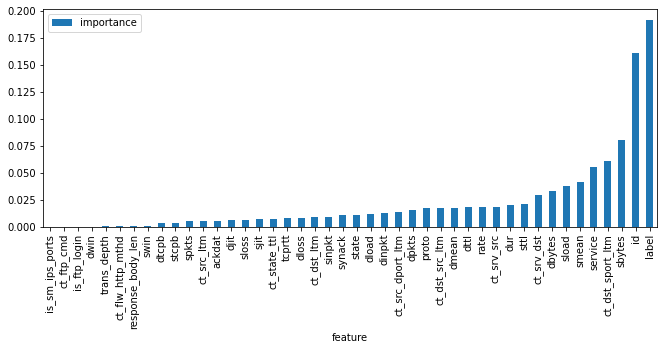

In [12]:
#Checking which variable is useful in calculating the target variable

rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [13]:
# Splitting training data for training and testing the ML models
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,test_size=0.80, random_state=2)
mlrx_train,mlrx_test,mlry_train,mlry_test = train_test_split(train_x,lir_tar_train,test_size=0.80, random_state = 2)

In [14]:
#Training different Machine Learning models for comapritive analysis
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0) #Decision Tree Classifier
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0) #Logistic Regression
BNB_Classifier = BernoulliNB() #Naive Bayes Algorithm
LIR_Classifier = LinearRegression() #Multi Linear Regression
SVM_Classifier = SVC(kernel = 'poly',C = 75) #Support Vector Machine

In [ ]:
# Fitting above trained models
DTC_Classifier.fit(X_train, Y_train)
LGR_Classifier.fit(X_train, Y_train)
BNB_Classifier.fit(X_train, Y_train)
LIR_Classifier.fit(mlrx_train, mlry_train)
SVM_Classifier.fit(X_train,Y_train)

In [16]:
models = []
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Logistic Regression', LGR_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Support Vector Machine', SVM_Classifier))

In [ ]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

In [18]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.875565542161358

Confusion matrix:
 [[   48    95   114   175   114     0     0     8     0     0]
 [   73    21    90   154   109     6     0     8     4     0]
 [   90    90  1097  1454   308    55     0   171    32     0]
 [  119   160  1436  6111   517   124     0   334    64    32]
 [   80   109   290   491  3729    46     0    55    51     0]
 [    3     2    81   202    66 14727     0    11    12     0]
 [    0     0     0     0     0     0 29569     0     0     0]
 [    4     5   177   307    49     8     0  2222    20     1]
 [    1     0    34    45    44    10     0    17   145     3]
 [    0     0     0    24     7     2     0     1     2     1]]

Classification report:
                 precision    recall  f1-score   support

      Analysis       0.11      0.09      0.10       554
      Backdoor       0.04      0.05      0.04       465
           D

In [19]:
LIR_Classifier.score(mlrx_train,mlry_train)

0.5570711022500587

In [20]:
LIR_Classifier.score(mlrx_test,mlry_test)

0.5579053349947546

In [21]:
import colorama
from colorama import Fore

pred_df = pd.concat([int_preddf,encpred],axis=1)

while(True):
    choice = input(Fore.BLUE+'Enter \'single\' for predicting single value\nEnter \'range\' to predict a range of values : ')
    if(choice=='range'):
        print()
        start,end = map(int,input(Fore.BLUE+'Enter the range for prediction between [0,175340]: ').split())
        prediction = pred_df[start:end]
        tar = target[start:end]
        break
    elif(choice=='single'):
        predict_column = int(input(Fore.BLUE+'Enter the value between [0,175340]: '))
        prediction = pred_df[predict_column:predict_column+1]
        tar = target[predict_column:predict_column+1]
        break
    else:
        print(Fore.RED+'Enter correct choice')
        
tar = list(tar)
print(tar)
prediction

Enter 'single' for predicting single value
Enter 'range' to predict a range of values : range

Enter the range for prediction between [0,175340]: 123456 123470
['Backdoor', 'Exploits', 'Exploits', 'DoS', 'DoS', 'Generic', 'Exploits', 'Generic', 'Generic', 'Fuzzers', 'Exploits', 'Exploits', 'Generic', 'Generic']


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto,service,state
123456,0.707001,-0.209774,-0.133677,-0.172047,-0.049465,-0.103923,1.438491,0.723268,-0.720406,1.025779,...,-0.11859,-0.11859,-0.189768,-0.475371,-0.288257,-0.126508,0.685014,63,0,3
123457,0.707021,0.512509,0.114703,0.880031,-0.041123,0.778741,-0.576624,-1.141901,1.560002,-0.389958,...,-0.11859,-0.11859,-0.189768,-0.715714,-0.753074,-0.126508,0.685014,113,7,2
123458,0.707041,-0.088826,-0.075235,-0.081351,-0.046021,-0.078125,-0.576673,-1.141901,1.560002,-0.389933,...,-0.11859,-0.11859,1.236347,-0.715714,-0.753074,-0.126508,0.685014,113,5,2
123459,0.707061,-0.055965,-0.075235,-0.099490,-0.046101,-0.096614,-0.576716,-1.141901,1.560002,-0.389942,...,-0.11859,-0.11859,1.236347,-0.595543,-0.753074,-0.126508,0.685014,113,5,2
123460,0.707080,-0.209773,-0.133677,-0.172047,-0.049465,-0.103923,0.094951,0.723268,-0.720406,0.081945,...,-0.11859,-0.11859,-0.189768,-0.355200,-0.567147,-0.126508,0.685014,93,0,3
123461,0.707100,-0.209774,-0.133677,-0.172047,-0.049958,-0.103923,0.286885,0.723268,-0.720406,-0.044125,...,-0.11859,-0.11859,-0.189768,1.207024,0.641377,-0.126508,0.685014,119,2,3
123462,0.707120,0.116380,0.012429,0.335852,-0.043892,0.270909,-0.576599,-1.141901,1.560002,-0.389950,...,-0.11859,-0.11859,-0.189768,-0.355200,-0.753074,-0.126508,0.685014,113,0,2
123463,0.707140,-0.209774,-0.133677,-0.172047,-0.049958,-0.103923,0.178922,0.723268,-0.720406,-0.087356,...,-0.11859,-0.11859,-0.189768,0.966682,2.035828,-0.126508,0.685014,119,2,3
123464,0.707159,-0.209774,-0.133677,-0.172047,-0.049958,-0.103923,0.430836,0.723268,-0.720406,0.013517,...,-0.11859,-0.11859,-0.189768,0.726339,0.548414,-0.126508,0.685014,119,2,3
123465,0.707179,-0.209773,-0.133677,-0.172047,-0.041192,-0.103923,-0.027189,0.723268,-0.720406,2.787747,...,-0.11859,-0.11859,-0.189768,1.567537,-0.474184,-0.126508,0.685014,119,0,3


In [22]:
DTC_prediction_result = DTC_Classifier.predict(prediction)
for i in range(len(DTC_prediction_result)):
    print(tar[i],DTC_prediction_result[i])

Backdoor Exploits
Exploits Exploits
Exploits Generic
DoS Generic
DoS Exploits
Generic Generic
Exploits Exploits
Generic Generic
Generic Generic
Fuzzers Fuzzers
Exploits Exploits
Exploits Exploits
Generic Generic
Generic Generic


In [18]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0,ignore_warnings = True, custom_metric = None)
models,predictions = clf.fit(X_train,X_test,Y_train,Y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [09:43<00:00, 20.13s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.89,0.52,None,0.89,2.49
RandomForestClassifier,0.89,0.52,None,0.89,5.00
DecisionTreeClassifier,0.88,0.51,None,0.87,1.32
ExtraTreesClassifier,0.88,0.50,None,0.88,3.83
QuadraticDiscriminantAnalysis,0.78,0.50,None,0.80,1.31
ExtraTreeClassifier,0.86,0.49,None,0.86,1.19
GaussianNB,0.68,0.46,None,0.73,1.26
SVC,0.87,0.46,None,0.87,61.19
SGDClassifier,0.85,0.46,None,0.85,1.41
